In [39]:
import pandas as pd

shot_data = pd.read_csv('C:/Users/tyler/GaTech/ISYE6740/FinalProject/Data/NBA_2004_2023_Shots.csv')
game_data = pd.read_csv('C:/Users/tyler/GaTech/ISYE6740/FinalProject/Data/games.csv')
merged_data = pd.read_csv('C:/Users/tyler/GaTech/ISYE6740/FinalProject/Data/ShotData.csv')

In [40]:
merged_data.isna().sum()

SEASON_1                 0
SEASON_2                 0
TEAM_ID                  0
TEAM_NAME                0
PLAYER_ID                0
PLAYER_NAME              0
POSITION_GROUP        6666
POSITION              6666
GAME_DATE                0
GAME_ID                  0
HOME_TEAM                0
AWAY_TEAM                0
EVENT_TYPE               0
SHOT_MADE                0
ACTION_TYPE              0
SHOT_TYPE                0
BASIC_ZONE               0
ZONE_NAME                0
ZONE_ABB                 0
ZONE_RANGE               0
LOC_X                    0
LOC_Y                    0
SHOT_DISTANCE            0
QUARTER                  0
MINS_LEFT                0
SECS_LEFT                0
Score_Difference    134132
HOME_TEAM_ID        134132
Home                     0
dtype: int64

In [41]:
scoreless_games = merged_data[merged_data["Score_Difference"].isna()]["GAME_ID"].unique()

In [42]:
missing_games = game_data[game_data['GAME_ID'].isin(scoreless_games)]
missing_games

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS


In [43]:
unmatched_games = shot_data[shot_data['GAME_ID'].isin(scoreless_games)]
unmatched_games

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
2871,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,12-23-2022,22200491,...,Above the Break 3,Left Side Center,LC,24+ ft.,15.90,24.950,25,1,11,24
2872,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,12-23-2022,22200491,...,Mid-Range,Right Side,R,8-16 ft.,-10.70,3.950,10,1,10,58
2873,2023,2022-23,1610612764,Washington Wizards,203078,Bradley Beal,G,SG,12-23-2022,22200491,...,Above the Break 3,Center,C,24+ ft.,-0.10,30.850,25,1,10,19
2874,2023,2022-23,1610612764,Washington Wizards,1628420,Monte Morris,G,PG,12-23-2022,22200491,...,Above the Break 3,Center,C,24+ ft.,-5.30,29.450,24,1,9,55
2875,2023,2022-23,1610612764,Washington Wizards,203078,Bradley Beal,G,SG,12-23-2022,22200491,...,Mid-Range,Left Side Center,LC,16-24 ft.,13.60,18.150,18,1,9,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624920,2021,2020-21,1610612746,Los Angeles Clippers,201587,Nicolas Batum,F,SF,12-22-2020,22000000,...,Left Corner 3,Left Side,L,24+ ft.,-2.36,6.135,23,1,10,48
624921,2021,2020-21,1610612751,Brooklyn Nets,202681,Kyrie Irving,G,PG,12-22-2020,22000000,...,Mid-Range,Center,C,16-24 ft.,-0.02,7.975,22,1,11,22
624922,2021,2020-21,1610612747,Los Angeles Lakers,2544,LeBron James,G,PG,12-22-2020,22000000,...,Above the Break 3,Center,C,24+ ft.,0.15,8.415,26,1,11,3
624923,2021,2020-21,1610612746,Los Angeles Clippers,201976,Patrick Beverley,G,PG,12-22-2020,22000000,...,Restricted Area,Center,C,Less Than 8 ft.,-0.10,5.885,1,1,11,28


In [44]:
len(scoreless_games)

754

In [45]:
len(game_data)

26651

In [46]:
len(shot_data['GAME_ID'].unique())

23993

In [47]:
merge_df = merged_data[~merged_data['GAME_ID'].isin(scoreless_games)]
merge_df

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,Score_Difference,HOME_TEAM_ID,Home
0,2023,2022-23,1610612764,Washington Wizards,203078,Bradley Beal,G,SG,10-19-2022,22200004,...,24+ ft.,23.4,12.95,24,1,11,20,7.0,1.610613e+09,False
1,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,10-19-2022,22200004,...,24+ ft.,-0.4,31.45,26,1,10,52,7.0,1.610613e+09,False
2,2023,2022-23,1610612764,Washington Wizards,1628420,Monte Morris,G,PG,10-19-2022,22200004,...,Less Than 8 ft.,-1.3,5.25,1,1,10,39,7.0,1.610613e+09,False
3,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,10-19-2022,22200004,...,Less Than 8 ft.,-0.1,7.25,2,1,10,31,7.0,1.610613e+09,False
4,2023,2022-23,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,10-19-2022,22200004,...,Less Than 8 ft.,1.8,7.15,2,1,10,5,7.0,1.610613e+09,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012556,2004,2003-04,1610612755,Philadelphia 76ers,2422,John Salmons,G,SG,10-28-2003,20300001,...,24+ ft.,23.3,9.55,23,1,11,21,15.0,1.610613e+09,True
4012557,2004,2003-04,1610612759,San Antonio Spurs,1938,Manu Ginobili,G,SG,10-28-2003,20300002,...,24+ ft.,15.1,25.85,25,1,11,24,1.0,1.610613e+09,True
4012558,2004,2003-04,1610612747,Los Angeles Lakers,406,Shaquille O'Neal,C,C,10-28-2003,20300003,...,Less Than 8 ft.,-4.7,9.85,6,1,11,39,16.0,1.610613e+09,True
4012559,2004,2003-04,1610612756,Phoenix Suns,2063,Jake Voskuhl,C,C,10-28-2003,20300002,...,Less Than 8 ft.,-2.3,6.05,2,1,11,42,1.0,1.610613e+09,False


In [48]:
merge_df.isna().sum()

SEASON_1               0
SEASON_2               0
TEAM_ID                0
TEAM_NAME              0
PLAYER_ID              0
PLAYER_NAME            0
POSITION_GROUP      5735
POSITION            5735
GAME_DATE              0
GAME_ID                0
HOME_TEAM              0
AWAY_TEAM              0
EVENT_TYPE             0
SHOT_MADE              0
ACTION_TYPE            0
SHOT_TYPE              0
BASIC_ZONE             0
ZONE_NAME              0
ZONE_ABB               0
ZONE_RANGE             0
LOC_X                  0
LOC_Y                  0
SHOT_DISTANCE          0
QUARTER                0
MINS_LEFT              0
SECS_LEFT              0
Score_Difference       0
HOME_TEAM_ID           0
Home                   0
dtype: int64

In [49]:
positionless_players = merge_df[merge_df["POSITION"].isna()]["PLAYER_NAME"].unique()
positionless_players

array(['O.G. Anunoby', 'Jeff Dowtin Jr.', 'John Butler Jr.', 'AJ Green',
       'Xavier Tillman', 'Xavier Tillman Sr.', 'OG Anunoby',
       'Jeff Dowtin', 'Charlie Brown Jr.', 'M.J. Walker', 'Trevon Scott',
       'P.J. Dozier', 'Cam Reynolds', 'T.J. Leaf', 'Michael Frazier II',
       'Jeffery Taylor', 'Vitor Faverani'], dtype=object)

In [50]:
merge_df[merge_df['PLAYER_NAME'].isin(positionless_players)]

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,Score_Difference,HOME_TEAM_ID,Home
14492,2023,2022-23,1610612761,Toronto Raptors,1628384,O.G. Anunoby,NaN,NaN,10-19-2022,22200008,...,24+ ft.,15.0,26.95,26,1,11,23,3.0,1.610613e+09,True
14495,2023,2022-23,1610612761,Toronto Raptors,1628384,O.G. Anunoby,NaN,NaN,10-19-2022,22200008,...,8-16 ft.,5.6,14.45,10,1,9,42,3.0,1.610613e+09,True
14507,2023,2022-23,1610612761,Toronto Raptors,1628384,O.G. Anunoby,NaN,NaN,10-19-2022,22200008,...,24+ ft.,-8.9,29.35,25,1,1,15,3.0,1.610613e+09,True
14515,2023,2022-23,1610612761,Toronto Raptors,1628384,O.G. Anunoby,NaN,NaN,10-19-2022,22200008,...,Less Than 8 ft.,2.1,10.05,5,2,9,24,3.0,1.610613e+09,True
14530,2023,2022-23,1610612761,Toronto Raptors,1628384,O.G. Anunoby,NaN,NaN,10-19-2022,22200008,...,Less Than 8 ft.,-0.1,4.65,0,2,1,54,3.0,1.610613e+09,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263434,2013,2012-13,1610612766,Charlotte Bobcats,203106,Jeffery Taylor,NaN,NaN,11-07-2012,21200053,...,Less Than 8 ft.,0.4,6.95,1,3,7,59,7.0,1.610613e+09,True
2264629,2013,2012-13,1610612766,Charlotte Bobcats,203106,Jeffery Taylor,NaN,NaN,11-07-2012,21200053,...,Less Than 8 ft.,-1.8,5.65,1,1,7,35,7.0,1.610613e+09,True
2264716,2013,2012-13,1610612766,Charlotte Bobcats,203106,Jeffery Taylor,NaN,NaN,11-07-2012,21200053,...,Less Than 8 ft.,1.5,5.65,1,1,8,54,7.0,1.610613e+09,True
2267692,2013,2012-13,1610612766,Charlotte Bobcats,203106,Jeffery Taylor,NaN,NaN,11-03-2012,21200034,...,16-24 ft.,18.2,7.45,18,4,3,53,27.0,1.610613e+09,False


In [51]:
merge_df.loc[merge_df['PLAYER_NAME'] == 'O.G. Anunoby', 'POSITION'] = 'SF'
merge_df.loc[merge_df['PLAYER_NAME'] == 'OG Anunoby', 'POSITION'] = 'SF'
merge_df.loc[merge_df['PLAYER_NAME'] == 'O.G. Anunoby', 'POSITION_GROUP'] = 'F'
merge_df.loc[merge_df['PLAYER_NAME'] == 'OG Anunoby', 'POSITION_GROUP'] = 'F'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Jeff Dowtin Jr.', 'POSITION'] = 'PG'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Jeff Dowtin Jr.', 'POSITION_GROUP'] = 'G'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Jeff Dowtin', 'POSITION'] = 'PG'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Jeff Dowtin', 'POSITION_GROUP'] = 'G'
merge_df.loc[merge_df['PLAYER_NAME'] == 'John Butler Jr.', 'POSITION'] = 'PF'
merge_df.loc[merge_df['PLAYER_NAME'] == 'John Butler Jr.', 'POSITION_GROUP'] = 'F'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Chance Comanche', 'POSITION'] = 'C'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Chance Comanche', 'POSITION_GROUP'] = 'C'
merge_df.loc[merge_df['PLAYER_NAME'] == 'AJ Green', 'POSITION'] = 'SG'
merge_df.loc[merge_df['PLAYER_NAME'] == 'AJ Green', 'POSITION_GROUP'] = 'G'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Xavier Tillman', 'POSITION'] = 'C'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Xavier Tillman', 'POSITION_GROUP'] = 'C'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Xavier Tillman Sr.', 'POSITION'] = 'C'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Xavier Tillman Sr.', 'POSITION_GROUP'] = 'C'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Charlie Brown Jr.', 'POSITION'] = 'SG'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Charlie Brown Jr.', 'POSITION_GROUP'] = 'G'
merge_df.loc[merge_df['PLAYER_NAME'] == 'M.J. Walker', 'POSITION'] = 'SG'
merge_df.loc[merge_df['PLAYER_NAME'] == 'M.J. Walker', 'POSITION_GROUP'] = 'G'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Trevon Scott', 'POSITION'] = 'SF'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Trevon Scott', 'POSITION_GROUP'] = 'F'
merge_df.loc[merge_df['PLAYER_NAME'] == 'P.J. Dozier', 'POSITION'] = 'SG'
merge_df.loc[merge_df['PLAYER_NAME'] == 'P.J. Dozier', 'POSITION_GROUP'] = 'G'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Cam Reynolds', 'POSITION'] = 'SF'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Cam Reynolds', 'POSITION_GROUP'] = 'F'
merge_df.loc[merge_df['PLAYER_NAME'] == 'T.J. Leaf', 'POSITION'] = 'PF'
merge_df.loc[merge_df['PLAYER_NAME'] == 'T.J. Leaf', 'POSITION_GROUP'] = 'F'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Michael Frazier II', 'POSITION'] = 'SG'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Michael Frazier II', 'POSITION_GROUP'] = 'G'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Jeffery Taylor', 'POSITION'] = 'SF'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Jeffery Taylor', 'POSITION_GROUP'] = 'F'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Vitor Faverani', 'POSITION'] = 'C'
merge_df.loc[merge_df['PLAYER_NAME'] == 'Vitor Faverani', 'POSITION_GROUP'] = 'C'

In [52]:
merge_df.isna().sum()

SEASON_1            0
SEASON_2            0
TEAM_ID             0
TEAM_NAME           0
PLAYER_ID           0
PLAYER_NAME         0
POSITION_GROUP      0
POSITION            0
GAME_DATE           0
GAME_ID             0
HOME_TEAM           0
AWAY_TEAM           0
EVENT_TYPE          0
SHOT_MADE           0
ACTION_TYPE         0
SHOT_TYPE           0
BASIC_ZONE          0
ZONE_NAME           0
ZONE_ABB            0
ZONE_RANGE          0
LOC_X               0
LOC_Y               0
SHOT_DISTANCE       0
QUARTER             0
MINS_LEFT           0
SECS_LEFT           0
Score_Difference    0
HOME_TEAM_ID        0
Home                0
dtype: int64

In [54]:
merge_df["TEAM_ID"].astype("object")
merge_df["PLAYER_ID"].astype("object")
merge_df["GAME_ID"].astype("object")
# merge_df["SEASON_1"] = pd.to_datetime(merge_df["SEASON_1"], format="%Y")
merge_df["GAME_DATE"] = pd.to_datetime(merge_df["GAME_DATE"])
merge_df.dtypes

C:\Users\tyler\AppData\Local\Temp\ipykernel_10332\1632218302.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df["GAME_DATE"] = pd.to_datetime(merge_df["GAME_DATE"])


SEASON_1                     int64
SEASON_2                    object
TEAM_ID                      int64
TEAM_NAME                   object
PLAYER_ID                    int64
PLAYER_NAME                 object
POSITION_GROUP              object
POSITION                    object
GAME_DATE           datetime64[ns]
GAME_ID                      int64
HOME_TEAM                   object
AWAY_TEAM                   object
EVENT_TYPE                  object
SHOT_MADE                     bool
ACTION_TYPE                 object
SHOT_TYPE                   object
BASIC_ZONE                  object
ZONE_NAME                   object
ZONE_ABB                    object
ZONE_RANGE                  object
LOC_X                      float64
LOC_Y                      float64
SHOT_DISTANCE                int64
QUARTER                      int64
MINS_LEFT                    int64
SECS_LEFT                    int64
Score_Difference           float64
HOME_TEAM_ID               float64
Home                

In [55]:
merge_df["TIME_LEFT_QUARTER"] = merge_df["MINS_LEFT"] * 60 + merge_df["SECS_LEFT"]
merge_df["TIME_LEFT_GAME"] = (4 - merge_df["QUARTER"]) * 15 * 60 + merge_df["TIME_LEFT_QUARTER"]



C:\Users\tyler\AppData\Local\Temp\ipykernel_10332\3572178281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df["TIME_LEFT_QUARTER"] = merge_df["MINS_LEFT"] * 60 + merge_df["SECS_LEFT"]
C:\Users\tyler\AppData\Local\Temp\ipykernel_10332\3572178281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df["TIME_LEFT_GAME"] = (4 - merge_df["QUARTER"]) * 15 * 60 + merge_df["TIME_LEFT_QUARTER"]


In [57]:
merge_df.SHOT_MADE

0           True
1          False
2           True
3           True
4           True
           ...  
4012556     True
4012557    False
4012558    False
4012559    False
4012560    False
Name: SHOT_MADE, Length: 3878429, dtype: bool

In [66]:
count_true = merge_df['SHOT_MADE'].sum()
count = len(merge_df)
total_accuracy = count_true/count

In [64]:
Clutch_time_threshold = [60,120,180,240,300]
accuracy = []

for i in Clutch_time_threshold:
    under = merge_df[merge_df['TIME_LEFT_GAME']<i]
    count_true_under = under['SHOT_MADE'].sum()
    count_under = len(under)
    accuracy.append(count_true_under/count_under)

(0.4, 0.5)

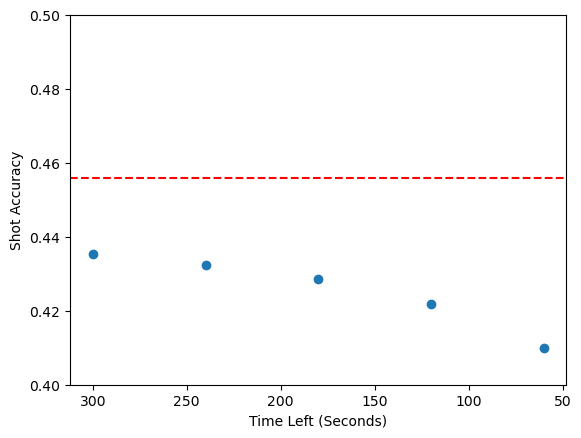

In [71]:
import matplotlib.pyplot as plt

plt.scatter(Clutch_time_threshold, accuracy, label='Clutch Threshold Plot')
plt.axhline(y=total_accuracy, color='r', linestyle='--', label='Total Shot Accuracy')
plt.xlabel('Time Left (Seconds)')
plt.ylabel('Shot Accuracy')
plt.gca().invert_xaxis()
plt.ylim(0.4, 0.5)

In [83]:
Clutch_time_threshold = [60,120,180,240,300]
score_diff_threshold = [4,5,6,7,8,9,10]
accuracy = []

for i in Clutch_time_threshold:
    score_accuracy = []
    for j in score_diff_threshold:
        df = merge_df[merge_df['Score_Difference']<j]
        under = merge_df[merge_df['TIME_LEFT_GAME']<i]
        count_true_under = under['SHOT_MADE'].sum()
        count_under = len(under)
        score_accuracy.append(count_true_under/count_under)
    accuracy.append(score_accuracy)

In [84]:
print(accuracy)

[[0.409890217444497, 0.409890217444497, 0.409890217444497, 0.409890217444497, 0.409890217444497, 0.409890217444497, 0.409890217444497], [0.4218058679585733, 0.4218058679585733, 0.4218058679585733, 0.4218058679585733, 0.4218058679585733, 0.4218058679585733, 0.4218058679585733], [0.428505647105745, 0.428505647105745, 0.428505647105745, 0.428505647105745, 0.428505647105745, 0.428505647105745, 0.428505647105745], [0.43226430546479744, 0.43226430546479744, 0.43226430546479744, 0.43226430546479744, 0.43226430546479744, 0.43226430546479744, 0.43226430546479744], [0.4353431751847993, 0.4353431751847993, 0.4353431751847993, 0.4353431751847993, 0.4353431751847993, 0.4353431751847993, 0.4353431751847993]]


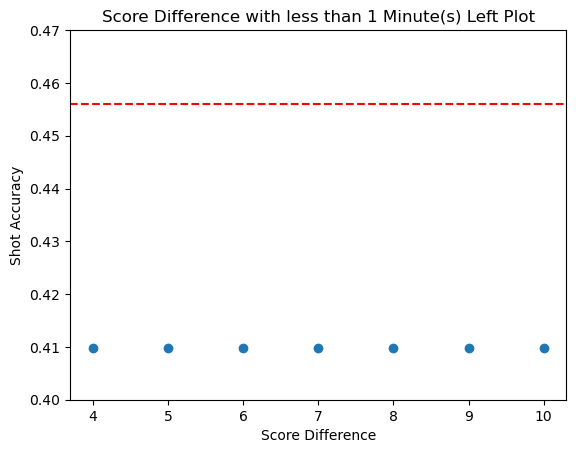

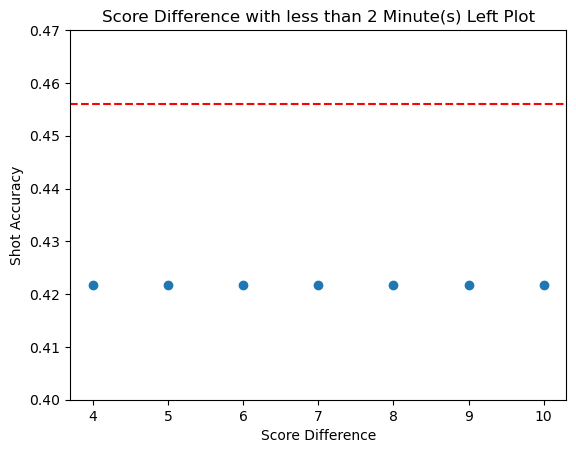

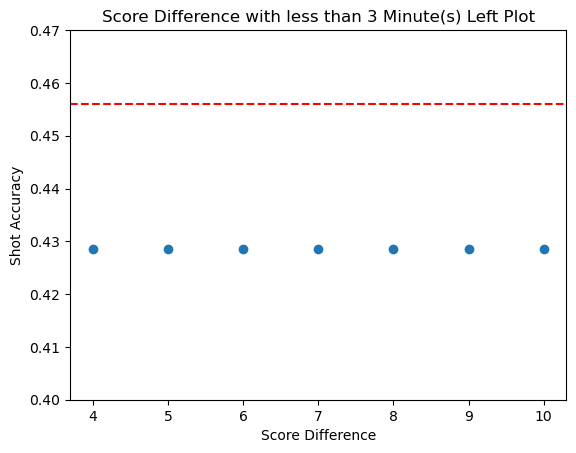

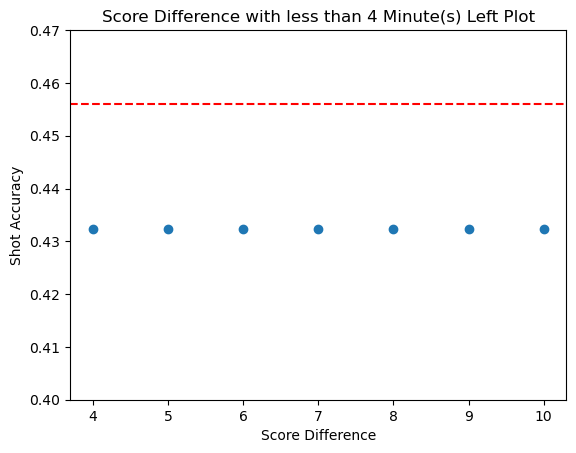

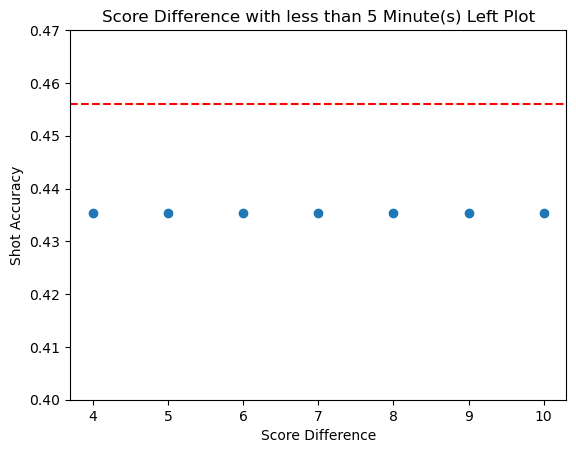

In [88]:
for i,y in enumerate(accuracy):
    plt.figure()
    plt.scatter(score_diff_threshold, y, label=f'Score Difference with less than {i+1} Minutes Left Plot')
    plt.axhline(y=total_accuracy, color='r', linestyle='--', label='Total Shot Accuracy')
    plt.title(f'Score Difference with less than {i+1} Minute(s) Left Plot')
    plt.xlabel('Score Difference')
    plt.ylabel('Shot Accuracy')
    plt.ylim(0.4, 0.47)
plt.show()
